In [1]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

In [2]:
import os
import sys
import warnings
import numpy

def warn(*args, **kwargs):
    pass

warnings.warn = warn
warnings.simplefilter(action='ignore', category=FutureWarning)
numpy.seterr(divide = 'ignore') 

sys.path.append(os.path.dirname(os.path.abspath('')))

In [3]:
from tensortrade.rewards import SimpleProfitStrategy
from tensortrade.actions import DiscreteActionStrategy
from tensortrade.exchanges.simulated import FBMExchange
from tensortrade.features.stationarity import FractionalDifference
from tensortrade.features.scalers import MinMaxNormalizer
from tensortrade.features import FeaturePipeline

normalize = MinMaxNormalizer(inplace=True)
difference = FractionalDifference(difference_order=0.6,
                                  inplace=True)
feature_pipeline = FeaturePipeline(steps=[normalize, difference])

reward_strategy = SimpleProfitStrategy()
action_strategy = DiscreteActionStrategy(n_actions=20, instrument_symbol='ETH/BTC')

exchange = FBMExchange(base_instrument='BTC',
                       timeframe='1h',
                       pretransform=True)

In [4]:
from tensortrade.environments import TradingEnvironment
from tensortrade.strategies import TensorforceTradingStrategy

network_spec = [
    dict(type='dense', size=128, activation="tanh"),
    dict(type='dense', size=64, activation="tanh"),
    dict(type='dense', size=32, activation="tanh")
]

agent_spec = {
    "type": "ppo",
    "learning_rate": 1e-4,
    "discount": 0.99,
    "likelihood_ratio_clipping": 0.2,
    "estimate_terminal": False,
    "max_episode_timesteps": 2000,
    "network": network_spec,
    "batch_size": 10,
    "update_frequency": "never"
}

environment = TradingEnvironment(exchange=exchange,
                                 action_strategy=action_strategy,
                                 reward_strategy=reward_strategy,
                                 feature_pipeline=feature_pipeline)

strategy = TensorforceTradingStrategy(environment=environment, agent_spec=agent_spec)

{'open': 2010-01-01 00:00:00    0.010000
2010-01-01 01:00:00    0.009992
2010-01-01 02:00:00    0.009984
2010-01-01 03:00:00    0.009984
2010-01-01 04:00:00    0.009984
                         ...   
2010-03-11 06:00:00    0.008304
2010-03-11 07:00:00    0.008320
2010-03-11 08:00:00    0.008336
2010-03-11 09:00:00    0.008344
2010-03-11 10:00:00    0.008368
Freq: H, Name: open, Length: 1667, dtype: float32}
{'high': 2010-01-01 00:00:00    0.010008
2010-01-01 01:00:00    0.009992
2010-01-01 02:00:00    0.009992
2010-01-01 03:00:00    0.009984
2010-01-01 04:00:00    0.009984
                         ...   
2010-03-11 06:00:00    0.008320
2010-03-11 07:00:00    0.008336
2010-03-11 08:00:00    0.008352
2010-03-11 09:00:00    0.008360
2010-03-11 10:00:00    0.008368
Freq: H, Name: high, Length: 1667, dtype: float32}
{'low': 2010-01-01 00:00:00    0.009992
2010-01-01 01:00:00    0.009984
2010-01-01 02:00:00    0.009984
2010-01-01 03:00:00    0.009976
2010-01-01 04:00:00    0.009952
        

In [5]:
performance = strategy.run(steps=100, evaluation=False)

performance[-5:]

Timesteps:   0%|          | 0/100 [00:00<?, ?it/s, mean_reward=n/a]

{'open': 2010-01-01 00:00:00    0.010000
2010-01-01 01:00:00    0.010000
2010-01-01 02:00:00    0.010000
2010-01-01 03:00:00    0.009984
2010-01-01 04:00:00    0.009976
                         ...   
2010-03-11 06:00:00    0.009160
2010-03-11 07:00:00    0.009152
2010-03-11 08:00:00    0.009152
2010-03-11 09:00:00    0.009152
2010-03-11 10:00:00    0.009176
Freq: H, Name: open, Length: 1667, dtype: float32}
{'high': 2010-01-01 00:00:00    0.010000
2010-01-01 01:00:00    0.010000
2010-01-01 02:00:00    0.010000
2010-01-01 03:00:00    0.009992
2010-01-01 04:00:00    0.009976
                         ...   
2010-03-11 06:00:00    0.009160
2010-03-11 07:00:00    0.009160
2010-03-11 08:00:00    0.009152
2010-03-11 09:00:00    0.009176
2010-03-11 10:00:00    0.009192
Freq: H, Name: high, Length: 1667, dtype: float32}
{'low': 2010-01-01 00:00:00    0.010000
2010-01-01 01:00:00    0.009992
2010-01-01 02:00:00    0.009984
2010-01-01 03:00:00    0.009976
2010-01-01 04:00:00    0.009968
        

Timesteps:   0%|          | 0/100 [00:04<?, ?it/s, mean_reward=n/a]

Finished running strategy.
Total episodes: 0 (100 timesteps).
Average reward: -224.82485652676135.


,balance,net_worth
58,79.798286,9288.295721
59,4670.848387,9275.097055
60,6967.933266,9271.929295
61,134.120210,9269.942290
62,6995.355820,9288.580640


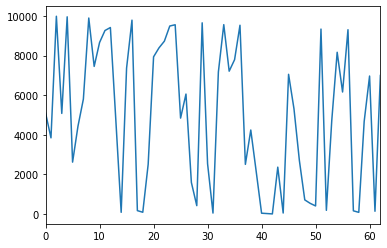

In [6]:
performance.balance.plot()

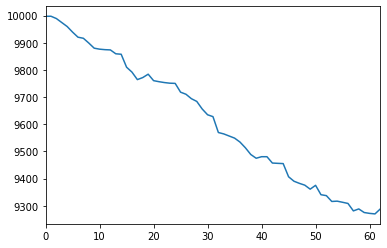

In [7]:
performance.net_worth.plot()

In [8]:
strategy.save_agent(directory='agents')